In [6]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'F:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set


In [1]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *
from utils.cluster import *
from utils.trader import *

In [7]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)
print(f"Eligible dates loaded: {eligible_dates}")

Successfully read 5269 paths from /Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/eligible_dates.txt
Eligible dates loaded: ['/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000103.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000316.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000331.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000414.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20001218.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2001/20010102.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2001/20010103.csv.gz', '/Users/yif

In [25]:
def winsorize(data, lower_pct, upper_pct):
    """
    Winsorize a list or array of numbers by replacing values below the lower 
    percentile and above the upper percentile with the respective percentile values.

    Parameters:
        data (list or np.ndarray): The input numeric data.
        lower_pct (float): Lower percentile threshold (e.g., 0.05 for 5%).
        upper_pct (float): Upper percentile threshold (e.g., 0.95 for 95%).

    Returns:
        np.ndarray: Winsorized version of the input data.
    """
    data = np.asarray(data)
    lower_bound = np.percentile(data, lower_pct * 100)
    upper_bound = np.percentile(data, upper_pct * 100)
    
    return np.clip(data, lower_bound, upper_bound)

In [ ]:
# def clusterize_yes(cl_med: str, num_med: str, R_cov: pd.DataFrame, market_cov, clustering_window=20, default_cluster_num=15):
#     R = R_cov.copy()
#     market = market_cov.copy()

#     # compute the correlation matrix used for clusterization
#     residual_returns_matrix = get_market_residual_returns(R, market)
#     residual_returns_matrix = residual_returns_matrix.astype(float).T
    
#     # """ WINSORIZATION! """
#     # for i in range(residual_returns_matrix.shape[0]):
#     #     residual_returns_matrix[i, :] = winsorize(residual_returns_matrix[i, :])
    
#     corr = compute_correlation_matrix(residual_returns_matrix)

#     # choose which clusterization method to use
#     if cl_med == 'SPONGE':

#         # determine the number of clusters for the SPONGE algorithm
#         # 'var' means we use percent of explained variance
#         # 'mar-pa' means we use the marchenko-pastur distribution
#         if num_med == 'var' or num_med == 'mar-pa':
#             RRT_num_clusters = residual_returns_matrix[-clustering_window :, :]
#         cov = 1/(clustering_window) * (RRT_num_clusters.T @ RRT_num_clusters)
#         if num_med == 'var':
#             k = get_num_of_clusters(cov, 0.9)
#         if num_med == 'mar-pa':
#             num_of_stocks = RRT_num_clusters.shape[1]
#             rho = num_of_stocks / clustering_window
#             lambda_plus = (1 + np.sqrt(rho)) ** 2
#             print(lambda_plus)
#             eigs = eigh(cov, eigvals_only=True)
#             print(eigs)
#             plt.figure(figsize=(6, 4))
#             plt.hist(eigs, bins=20, edgecolor='black', alpha=0.7)
#             plt.title("Distribution of Eigenvalues")
#             plt.xlabel("Eigenvalue")
#             plt.ylabel("Frequency")
#             plt.grid(True)
#             plt.tight_layout()
#             plt.show()
#             k = np.sum(eigs > lambda_plus)
#             print(k)
#         # 'self' means we pass in # of clusters ourselves
#         if num_med == 'self':
#             k = default_cluster_num
#         # split the correlation matrix into positive and negative parts
#         G_plus = np.maximum(corr, 0)
#         G_minus = np.maximum(-corr, 0)
#         # call the SPONGE algorithm
#         c = Cluster((csc_matrix(G_plus), csc_matrix(G_minus)))
#         predictions = c.SPONGE(k=k, tau_p=1, tau_n=1, eigens=None, mi=None)
#         # append predicted cluster assignments
#         R['cluster'] = predictions

#     # cluster stocks based on given industry data
#     # any stock that does not belong to the given list of stock-industry pairs
#     # is clustered into one single, separate cluster
#     # if cl_med == 'industry':
#     #   ticker_to_cluster = dict(zip(sector['SPY.1'], sector['0']))
#     #   R['cluster'] = R['ticker'].map(ticker_to_cluster)
#     #   R['cluster'] = pd.to_numeric(R['cluster'], errors='coerce').astype('Int64')
#     #   max_cluster = R['cluster'].max()
#     #   R['cluster'] = R['cluster'].fillna(max_cluster + 1).astype(int)
#     return R

In [ ]:
# def execute_trading_strategy(win_threshold: float,
#                             lookback_window = 60,
#                             lookforward_window = 3,
#                             w = 5,
#                             eligible_dates = None,
#                             cl_med = 'SPONGE',
#                             num_med = 'var'):
#     # record the total number of days
#     num_dates = len(eligible_dates)
#     # first trading day
#     current_date = lookback_window
#     # record daily_PnL
#     daily_PnL = []
#     curr_date_str = []

# # renew_portfolio criteria
#     # trading_period = 0
#     # trading_PnL = 0
#     # update_portfolio = True

#     while current_date + lookforward_window < 200:
#         start_date = current_date - lookback_window
#         # size of R_curr: #stocks x (1 ticker + 63 days)
#         # size of market_curr: 63
#         R_curr, market_curr = get_sliding_window_data(eligible_dates = eligible_dates,
#                                                     lookback_window = lookback_window,
#                                                     lookforward_window=lookforward_window,
#                                                     start_date = start_date)
        
#         # """ WINSORIZATION! """
#         # R_curr_np = R_curr.select_dtypes(include='number').to_numpy()
#         # for j in range(R_curr_np.shape[1]):
#         #     R_curr_np[:,j] = winsorize(R_curr_np[:,j])
#         # R_curr.iloc[:, 1:] = R_curr_np
        
#         # R_cov is the matrix containing the return in the 60 days lookback window
#         R_cov = R_curr.iloc[:, : lookback_window + 1]
#         market_cov = market_curr[: lookback_window]
#         # clusterize the stocks
#         R_cov = clusterize_yes(cl_med, num_med, R_cov, market_cov)
#         R_cov = assign_stock_weights(identify_stocks(R_cov))
#         # calculate PnLs for the lookforward window
#         bet_size = R_cov['notional'].to_numpy()
#         lookback = -1 * lookforward_window
#         future_return = R_curr.iloc[:, lookback:].to_numpy()
#         PnLs = future_return.T @ bet_size
#         Cumpnl = np.cumsum(PnLs)

#         if np.max(Cumpnl) > win_threshold:
#             index = np.argmax(Cumpnl > win_threshold)
#             PnLs = PnLs[:index+1]

#             daily_PnL += PnLs.tolist()
#             current_date += index + 1
#             # record date stamps 
#             for i in range(index+1):
#                 curr_date_str.append(R_curr.columns[-lookforward_window+i])
#         else:
#             daily_PnL += PnLs.tolist()
#             current_date += lookforward_window
#             # record date stamps
#             for i in range(lookforward_window):
#                 curr_date_str.append(R_curr.columns[-lookforward_window+i])
#         print(f"Day {current_date+1}: PnL = {PnLs}")
#     date = pd.to_datetime(curr_date_str, format='%Y%m%d')
#     return daily_PnL, date

In [60]:
import time

start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

Day 64: PnL = [-0.06 -0.07  0.2 ]
Day 65: PnL = [0.16]
Day 68: PnL = [-0.06 -0.05 -0.06]
Day 71: PnL = [-0.03  0.   -0.19]
Day 73: PnL = [0.04 0.05]
Day 74: PnL = [0.15]
Day 77: PnL = [0.04 0.   0.01]
Day 80: PnL = [-0.02 -0.04 -0.01]
Day 83: PnL = [-0.05 -0.04 -0.  ]
Day 86: PnL = [-0.04 -0.03  0.16]
Day 89: PnL = [-0.05  0.03  0.08]
Day 92: PnL = [0.03 0.01 0.04]
Day 93: PnL = [0.08]
Day 96: PnL = [-0.03 -0.03 -0.02]
Day 99: PnL = [-0.01  0.03  0.01]
Day 101: PnL = [0.01 0.06]
Day 104: PnL = [0.01 0.01 0.07]
Day 106: PnL = [0.02 0.04]
Day 109: PnL = [-0.15 -0.02 -0.07]
Day 110: PnL = [0.05]
Day 113: PnL = [-0.1  -0.03  0.02]
Day 116: PnL = [-0.05 -0.21  0.12]
Day 119: PnL = [0.01 0.02 0.11]
Day 122: PnL = [-0.02  0.02  0.02]
Day 125: PnL = [-0.09 -0.03 -0.08]
Day 128: PnL = [-0.06 -0.06  0.04]
Day 131: PnL = [ 0.03  0.02 -0.01]
Day 132: PnL = [0.12]
Day 134: PnL = [0.03 0.05]
Day 137: PnL = [-0.01  0.01 -0.03]
Day 138: PnL = [0.13]
Day 141: PnL = [-0.04  0.01 -0.06]
Day 144: PnL = [-

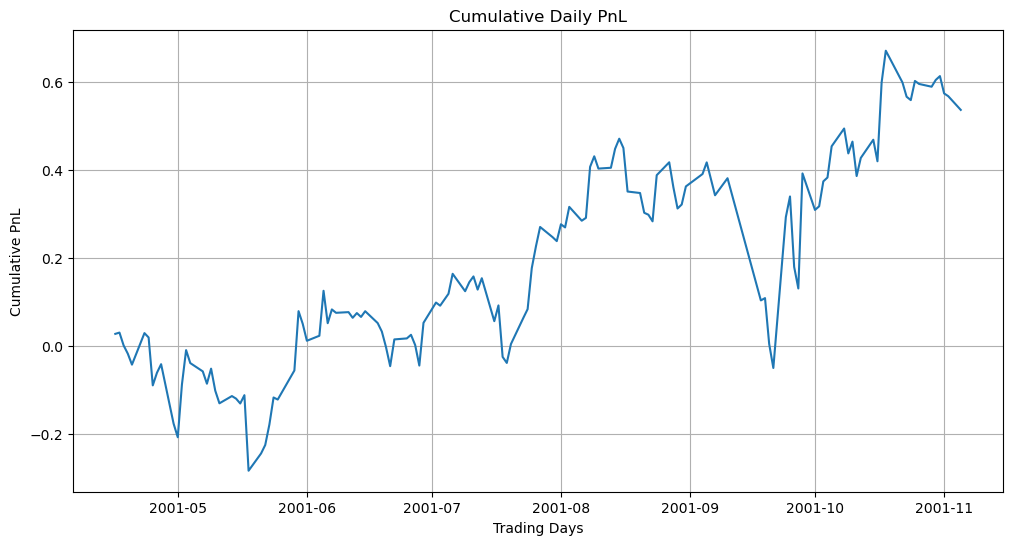

In [9]:
import matplotlib.pyplot as plt
cumulative_pnl = np.cumsum(daily_PnL)

plt.figure(figsize=(12, 6))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()

In [11]:
def calculate_sharpe_ratio(daily_PnL):
    mean = np.mean(daily_PnL)
    stdev = np.std(daily_PnL)
    SR = mean / stdev * np.sqrt(252)
    return SR

In [12]:
print(len(daily_PnL))

138


In [13]:
market_curr = get_sliding_window_data(eligible_dates = eligible_dates,
                                                    lookback_window = 138,
                                                    lookforward_window = 0,
                                                    start_date = 60)[1]

In [17]:
print(market_curr.shape)

(138, 2)


In [18]:
import statsmodels.api as sm
market_curr = sm.add_constant(market_curr)
market_curr = np.array(market_curr, dtype=float)
model = sm.OLS(daily_PnL, market_curr).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     28.11
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           4.52e-07
Time:                        10:37:34   Log-Likelihood:                -7.9970
No. Observations:                 138   AIC:                             19.99
Df Residuals:                     136   BIC:                             25.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0158      0.022      0.718      0.4

In [ ]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'F:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set'
]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)
    
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *

eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)
print(f"Eligible dates loaded: {eligible_dates}")
import time

start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

import matplotlib.pyplot as plt

# Save the plot in a 'results' folder in the same directory as this .py file
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter or interactive sessions
    script_dir = os.getcwd()
results_dir = os.path.join(script_dir, 'results')
os.makedirs(results_dir, exist_ok=True)
plot_path = os.path.join(results_dir, 'cumulative_pnl.png')
PnL_path = os.path.join(results_dir, 'daily_PnL.npy')
date_path = os.path.join(results_dir, 'date.npy')

np.save(PnL_path, daily_PnL)
np.save(date_path, date)

plt.figure(figsize=(14, 7))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
# Show only a subset of x-ticks for readability
if len(date) > 20:
    step = max(1, len(date) // 20)
    plt.xticks(date[::step])
plt.tight_layout()
plt.savefig(plot_path)
plt.close()
print(f"Plot saved to {plot_path}")



Using data path: /Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set
Successfully read 5269 paths from /Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/eligible_dates.txt
Eligible dates loaded: ['/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000103.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000316.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000331.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20000414.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2000/20001218.csv.gz', '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data/CRSP Data Set/2001/20010102.csv.gz', '/Users/yifangu/De

/usr/local/Caskroom/miniconda/base/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 7 with accuracies 
[6.17e-06 1.17e-06 5.34e-06 4.25e-06 8.94e-05 1.18e-08 3.57e-09 6.96e-10
 5.35e-10 1.01e-10 4.69e-11 3.59e-11]
not reaching the requested tolerance 3.719329833984375e-05.
Use iteration 7 instead with accuracy 
8.859282353933653e-06.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 186: PnL = [-0.05  0.14]
Day 187: PnL = [0.07]
Day 190: PnL = [-0.02 -0.05 -0.03]
Day 193: PnL = [-0.    0.04  0.  ]
Day 196: PnL = [-0.02  0.01  0.01]
Day 199: PnL = [-0.05 -0.   -0.04]
Execution time: 260.78 seconds


NameError: name 'cumulative_pnl' is not defined

<Figure size 1400x700 with 0 Axes>

In [ ]:
cumulative_pnl = np.cumsum(daily_PnL)
import matplotlib.pyplot as plt

# Save the plot in a 'results' folder in the same directory as this .py file
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter or interactive sessions
    script_dir = os.getcwd()
results_dir = os.path.join(script_dir, 'results')
os.makedirs(results_dir, exist_ok=True)
plot_path = os.path.join(results_dir, 'cumulative_pnl.png')
PnL_path = os.path.join(results_dir, 'daily_PnL.npy')
date_path = os.path.join(results_dir, 'date.npy')

np.save(PnL_path, daily_PnL)
np.save(date_path, date)

plt.figure(figsize=(14, 7))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
# Show only a subset of x-ticks for readability
if len(date) > 20:
    step = max(1, len(date) // 20)
    plt.xticks(date[::step])
plt.tight_layout()
plt.savefig(plot_path)
plt.close()
print(f"Plot saved to {plot_path}")
    


Plot saved to /Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/results/cumulative_pnl.png


In [20]:
from utils.cluster import *

In [2]:
def clusterize(cl_med: str, num_med: str, R_cov: pd.DataFrame, market_cov, winsorize_res, winsor_param, clustering_window=20, default_cluster_num=40):
    R = R_cov.copy()
    market = market_cov.copy()

    # compute the correlation matrix used for clusterization
    residual_returns_matrix = get_market_residual_returns(R, market)
    residual_returns_matrix = residual_returns_matrix.astype(float).T
    
    if winsorize_res:
        for i in range(residual_returns_matrix.shape[0]):
            residual_returns_matrix[i, :] = winsorize(residual_returns_matrix[i, :], winsor_param, 1-winsor_param)
    
    corr = compute_correlation_matrix(residual_returns_matrix)

    # choose which clusterization method to use
    if cl_med == 'SPONGE':

        # determine the number of clusters for the SPONGE algorithm
        # 'var' means we use percent of explained variance
        # 'mar-pa' means we use the marchenko-pastur distribution
        if num_med == 'var' or num_med == 'mar-pa':
            RRT_num_clusters = residual_returns_matrix[-clustering_window :, :]
            cov = 1/(clustering_window) * (RRT_num_clusters.T @ RRT_num_clusters)
        if num_med == 'var':
            k = get_num_of_clusters(cov, 0.9)
        if num_med == 'mar-pa':
            num_of_stocks = RRT_num_clusters.shape[1]
            rho = num_of_stocks / clustering_window
            lambda_plus = (1 + np.sqrt(rho)) ** 2
            print(lambda_plus)
            eigs = eigh(cov, eigvals_only=True)
            print(eigs)
            plt.figure(figsize=(6, 4))
            plt.hist(eigs, bins=20, edgecolor='black', alpha=0.7)
            plt.title("Distribution of Eigenvalues")
            plt.xlabel("Eigenvalue")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            k = np.sum(eigs > lambda_plus)
            print(k)
        # 'self' means we pass in # of clusters ourselves
        if num_med == 'self':
            k = default_cluster_num
        # split the correlation matrix into positive and negative parts
        G_plus = np.maximum(corr, 0)
        G_minus = np.maximum(-corr, 0)
        # call the SPONGE algorithm
        c = Cluster((csc_matrix(G_plus), csc_matrix(G_minus)))
        predictions = c.SPONGE(k=k, tau_p=1, tau_n=1, eigens=None, mi=None)
        # append predicted cluster assignments
        R['cluster'] = predictions

    # cluster stocks based on given industry data
    # any stock that does not belong to the given list of stock-industry pairs
    # is clustered into one single, separate cluster
    # if cl_med == 'industry':
    #   ticker_to_cluster = dict(zip(sector['SPY.1'], sector['0']))
    #   R['cluster'] = R['ticker'].map(ticker_to_cluster)
    #   R['cluster'] = pd.to_numeric(R['cluster'], errors='coerce').astype('Int64')
    #   max_cluster = R['cluster'].max()
    #   R['cluster'] = R['cluster'].fillna(max_cluster + 1).astype(int)
    return R

In [ ]:
def execute_trading_strategy(win_threshold: float,
                            lookback_window = 60,
                            lookforward_window = 3,
                            w = 5,
                            eligible_dates = None,
                            cl_med = 'SPONGE',
                            num_med = 'var',
                            weighting_scheme = 'uniform',
                            winsorize_raw = False,
                            winsorize_res = False,
                            winsor_param = 0.05):
    # record the total number of days
    num_dates = len(eligible_dates)
    # first trading day
    current_date = lookback_window
    # record daily_PnL
    daily_PnL = []
    curr_date_str = []

# renew_portfolio criteria
    # trading_period = 0
    # trading_PnL = 0
    # update_portfolio = True

    # while current_date + lookforward_window < num_dates:
    while current_date + lookforward_window < 200:
        start_date = current_date - lookback_window
        # size of R_curr: #stocks x (1 ticker + 63 days)
        # size of market_curr: 63
        R_curr, market_curr = get_sliding_window_data(eligible_dates = eligible_dates,
                                                    lookback_window = lookback_window,
                                                    lookforward_window=lookforward_window,
                                                    start_date = start_date)
        
        if winsorize_raw:
            R_curr_np = R_curr.select_dtypes(include='number').to_numpy()
            for j in range(R_curr_np.shape[1]):
                R_curr_np[:,j] = winsorize(R_curr_np[:,j], winsor_param, 1-winsor_param)
            R_curr.iloc[:, 1:] = R_curr_np
        
        # R_cov is the matrix containing the return in the 60 days lookback window
        R_cov = R_curr.iloc[:, : lookback_window + 1]
        market_cov = market_curr[: lookback_window]
        # clusterize the stocks
        R_cov = clusterize(cl_med, num_med, R_cov, market_cov, winsorize_res, winsor_param)
        R_cov = assign_stock_weights(identify_stocks(R_cov), weighting_scheme = weighting_scheme)
        # calculate PnLs for the lookforward window
        bet_size = R_cov['notional'].to_numpy()
        lookback = -1 * lookforward_window
        future_return = R_curr.iloc[:, lookback:].to_numpy()
        num_clusters = R_cov['cluster'].nunique()
        PnLs = future_return.T @ bet_size / (2 * num_clusters)
        Cumpnl = np.cumsum(PnLs)

        if np.max(Cumpnl) > win_threshold:
            index = np.argmax(Cumpnl > win_threshold)
            PnLs = PnLs[:index+1]

            daily_PnL += PnLs.tolist()
            current_date += index + 1
            # record date stamps 
            for i in range(index+1):
                curr_date_str.append(R_curr.columns[-lookforward_window+i])
        else:
            daily_PnL += PnLs.tolist()
            current_date += lookforward_window
            # record date stamps
            for i in range(lookforward_window):
                curr_date_str.append(R_curr.columns[-lookforward_window+i])
        print(f"Day {current_date+1}: PnL = {PnLs}")
    date = pd.to_datetime(curr_date_str, format='%Y%m%d')
    return daily_PnL, date

In [13]:
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates,
                                      cl_med = 'SPONGE',
                            num_med = 'var',
                            weighting_scheme = 'uniform',
                            winsorize_raw = False,
                            winsorize_res = False,
                            winsor_param = 0.05)

KeyError: 'cluster'